# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_response=city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response["coord"]["lat"]
        city_lng = city_weather_response["coord"]["lon"]
        city_max_temp = city_weather_response["main"]["temp_max"]
        city_humidity = city_weather_response["main"]["humidity"]
        city_clouds = city_weather_response["clouds"]["all"]
        city_wind = city_weather_response["wind"]["speed"]
        city_country = city_weather_response["sys"]["country"]
        city_date = city_weather_response["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | le port
Processing Record 3 of Set 1 | rundu
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | do gonbadan
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | boyolangu
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | esmeralda
Processing Record 18 of Set 1 | isla vista
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of S

Processing Record 40 of Set 4 | wichita falls
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | gambiran
Processing Record 44 of Set 4 | awjilah
Processing Record 45 of Set 4 | balkanabat
Processing Record 46 of Set 4 | fuerte olimpo
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | zhezkazgan
Processing Record 49 of Set 4 | port macquarie
Processing Record 0 of Set 5 | roxana
Processing Record 1 of Set 5 | laguna
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | svetlogorsk
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | minsk
Processing Record 7 of Set 5 | lake charles
Processing Record 8 of Set 5 | kimbe
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | rio claro
Processing Record 11 of Set 5 | karratha
Processing Record 12 of Set 5 | unye
City not found. Skipp

Processing Record 28 of Set 8 | kautokeino
Processing Record 29 of Set 8 | malanje
Processing Record 30 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 31 of Set 8 | damietta
Processing Record 32 of Set 8 | roebourne
Processing Record 33 of Set 8 | kidal
Processing Record 34 of Set 8 | nortelandia
Processing Record 35 of Set 8 | minab
Processing Record 36 of Set 8 | tres arroyos
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8 | esna
Processing Record 39 of Set 8 | bangkal
Processing Record 40 of Set 8 | mersin
Processing Record 41 of Set 8 | hunza
City not found. Skipping...
Processing Record 42 of Set 8 | graham
Processing Record 43 of Set 8 | molln
Processing Record 44 of Set 8 | ugoofaaru
Processing Record 45 of Set 8 | sandwick
Processing Record 46 of Set 8 | borazjan
Processing Record 47 of Set 8 | kilosa
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | shellbrook
Processing Record 0 of Set 9 | temaraia
City not fo

City not found. Skipping...
Processing Record 18 of Set 12 | izumo
Processing Record 19 of Set 12 | acari
Processing Record 20 of Set 12 | aykhal
Processing Record 21 of Set 12 | mackay
Processing Record 22 of Set 12 | zasheyek
Processing Record 23 of Set 12 | lompoc
Processing Record 24 of Set 12 | poum
Processing Record 25 of Set 12 | majene
Processing Record 26 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 12 | ballina
Processing Record 28 of Set 12 | tabou
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | semirom
Processing Record 31 of Set 12 | nouadhibou
Processing Record 32 of Set 12 | gornopravdinsk
Processing Record 33 of Set 12 | pontianak
Processing Record 34 of Set 12 | selma
Processing Record 35 of Set 12 | villanueva
Processing Record 36 of Set 12 | saint-francois
Processing Record 37 of Set 12 | george
Processing Record 38 of Set 12 | vestmannaeyjar
Processing Record 39 of Set 12 | paramonga
Processing Record 40 of S

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,42.51,70,95,3.00,US,1676067922
1,le port,-20.9373,55.2919,78.80,77,21,6.87,RE,1676067564
2,rundu,-17.9333,19.7667,68.34,76,47,3.47,NA,1676068088
3,castro,-24.7911,-50.0119,63.10,98,95,4.63,BR,1676068087
4,clyde river,70.4692,-68.5914,-32.57,61,0,2.30,CA,1676068088


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,42.51,70,95,3.00,US,1676067922
1,le port,-20.9373,55.2919,78.80,77,21,6.87,RE,1676067564
2,rundu,-17.9333,19.7667,68.34,76,47,3.47,NaN,1676068088
3,castro,-24.7911,-50.0119,63.10,98,95,4.63,BR,1676068087
4,clyde river,70.4692,-68.5914,-32.57,61,0,2.30,CA,1676068088


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

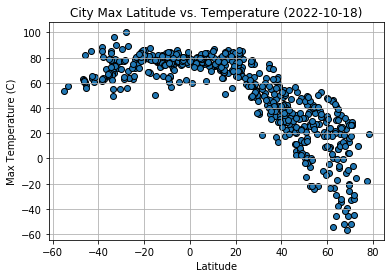

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black",marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

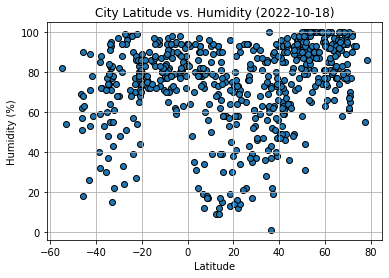

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black", marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

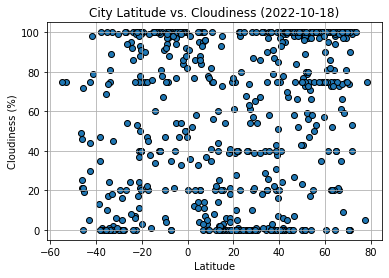

In [28]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolor="black", marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

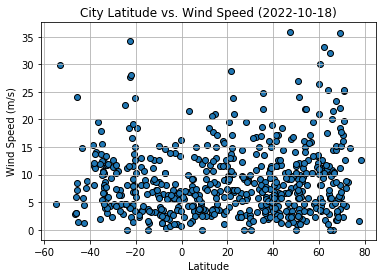

In [30]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black",marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [144]:
# Define a function to create Linear Regression plots

def linear_reg(x_values,y_values,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,coordinates,fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()



In [134]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,42.51,70,95,3.00,US,1676067922
4,clyde river,70.4692,-68.5914,-32.57,61,0,2.30,CA,1676068088
5,jamestown,42.0970,-79.2353,36.01,90,100,17.27,US,1676068089
6,butaritari,3.0707,172.7902,80.89,80,86,21.56,KI,1676068089
8,narsaq,60.9167,-46.0500,23.22,93,81,4.23,GL,1676068090


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,le port,-20.9373,55.2919,78.80,77,21,6.87,RE,1676067564
2,rundu,-17.9333,19.7667,68.34,76,47,3.47,NaN,1676068088
3,castro,-24.7911,-50.0119,63.10,98,95,4.63,BR,1676068087
7,punta arenas,-53.1500,-70.9167,57.31,54,75,29.93,CL,1676067566
9,bluff,-46.6000,168.3333,62.80,69,49,2.80,NZ,1676068091


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8342062127534547


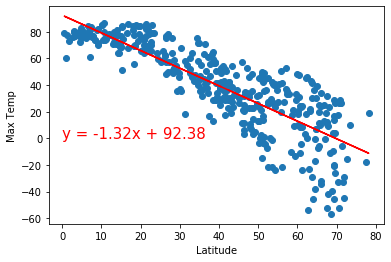

In [145]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df ["Lat"]
y_values=northern_hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
linear_reg(x_values,y_values,(0,0))

The r-value is: 0.3563753043025476


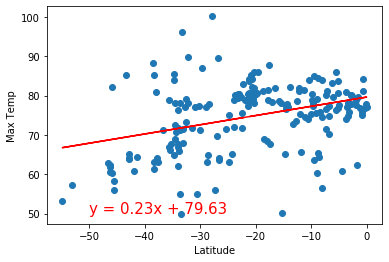

In [165]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df ["Lat"]
y_values=southern_hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
linear_reg(x_values,y_values,(-50,50))

**Discussion about the linear relationship:** The nearest to the ecuator (latitude 0) we can find the hottest temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4219809016667394


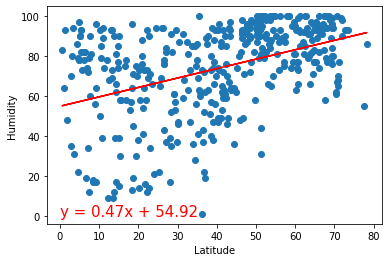

In [148]:
# Northern Hemisphere

# YOUR CODE HERE
x_values=northern_hemi_df ["Lat"]
y_values=northern_hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
linear_reg(x_values,y_values,(0,0))

The r-value is: 0.40685110102180727


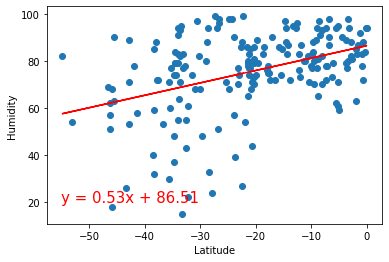

In [161]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df ["Lat"]
y_values=southern_hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
linear_reg(x_values,y_values,(-55,20))

**Discussion about the linear relationship:** In the northen hemisphere we can find more humidity far away from the ecuator. In the southern hemisphere we can find more humidity in the zone near from the ecuator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3579476280354039


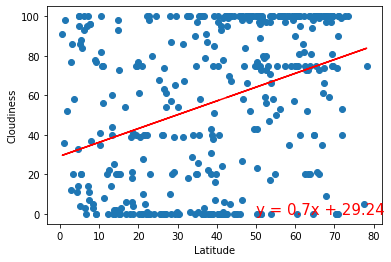

In [169]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df ["Lat"]
y_values=northern_hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
linear_reg(x_values,y_values,(50,0))

The r-value is: 0.43842983151231063


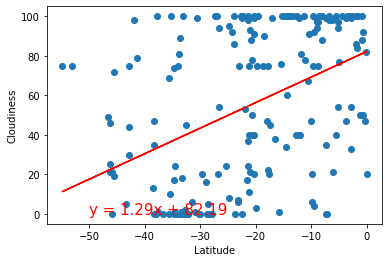

In [189]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df ["Lat"]
y_values=southern_hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
linear_reg(x_values,y_values,(-50,0))

**Discussion about the linear relationship:** In the northern and southern hemisphere we can find cludiness in the zones near and far away from the ecuator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15286085695502172


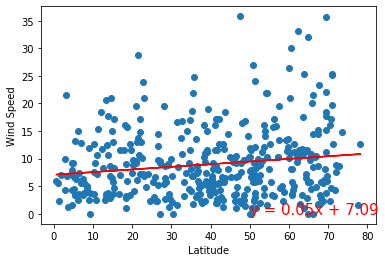

In [190]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df ["Lat"]
y_values=northern_hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_reg(x_values,y_values,(50,0))

The r-value is: -0.22824731746336815


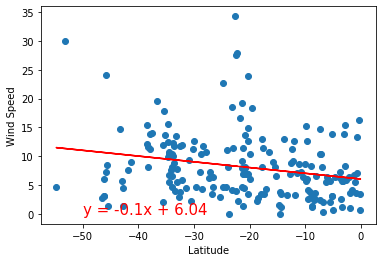

In [193]:
# Southern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df ["Lat"]
y_values=southern_hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
linear_reg(x_values,y_values,(-50,0))

**Discussion about the linear relationship:** There is no correlation between the wind speed and the latitude.